# Time Series Analysis

## APIs: Application Programing Interface

- `API`s will normally return `JSON` (JavaScript Object Notation) information

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import timedelta, datetime
import statsmodels.api as sm
import requests

import warnings
warnings.filterwarnings("ignore")

import acquire

sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

In [2]:
url = 'https://swapi.dev/api/people/1/'

In [6]:
response = requests.get(url)

In [8]:
response.ok

True

In [10]:
response.status_code

200

In [12]:
response.text

'{"name":"Luke Skywalker","height":"172","mass":"77","hair_color":"blond","skin_color":"fair","eye_color":"blue","birth_year":"19BBY","gender":"male","homeworld":"https://swapi.dev/api/planets/1/","films":["https://swapi.dev/api/films/1/","https://swapi.dev/api/films/2/","https://swapi.dev/api/films/3/","https://swapi.dev/api/films/6/"],"species":[],"vehicles":["https://swapi.dev/api/vehicles/14/","https://swapi.dev/api/vehicles/30/"],"starships":["https://swapi.dev/api/starships/12/","https://swapi.dev/api/starships/22/"],"created":"2014-12-09T13:50:51.644000Z","edited":"2014-12-20T21:17:56.891000Z","url":"https://swapi.dev/api/people/1/"}'

In [14]:
response.json()

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'https://swapi.dev/api/planets/1/',
 'films': ['https://swapi.dev/api/films/1/',
  'https://swapi.dev/api/films/2/',
  'https://swapi.dev/api/films/3/',
  'https://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['https://swapi.dev/api/vehicles/14/',
  'https://swapi.dev/api/vehicles/30/'],
 'starships': ['https://swapi.dev/api/starships/12/',
  'https://swapi.dev/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'https://swapi.dev/api/people/1/'}

In [16]:
response.json().keys()

dict_keys(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color', 'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles', 'starships', 'created', 'edited', 'url'])

In [17]:
json = response.json()

In [18]:
json.keys()

dict_keys(['name', 'height', 'mass', 'hair_color', 'skin_color', 'eye_color', 'birth_year', 'gender', 'homeworld', 'films', 'species', 'vehicles', 'starships', 'created', 'edited', 'url'])

In [19]:
json['starships']

['https://swapi.dev/api/starships/12/', 'https://swapi.dev/api/starships/22/']

In [21]:
for ship in json['starships']:
    
    response = requests.get(ship)
    
    print(response.json()['name'])

X-wing
Imperial shuttle


In [22]:
base_url = 'https://swapi.dev/api/people/'

In [23]:
response = requests.get(base_url)

response.json()

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

In [25]:
names = []
height = []
mass = []

for i in range(1, 10):
    
    new_url = base_url + f'{i}/'
    
    response = requests.get(new_url)
    
    json = response.json()
    
    names.append(json['name'])
    
    height.append(json['height'])
    
    mass.append(json['mass'])
    
len(names), len(height), len(mass)

(9, 9, 9)

In [30]:
pd.DataFrame({'name': names,
              'height': height,
              'mass': mass
             })

,name,height,mass
0,Luke Skywalker,172,77
1,C-3PO,167,75
2,R2-D2,96,32
3,Darth Vader,202,136
4,Leia Organa,150,49
5,Owen Lars,178,120
6,Beru Whitesun lars,165,75
7,R5-D4,97,32
8,Biggs Darklighter,183,84


## Working with Time Series Data

## Data Preparation 

### The three main steps here:

- Acquire the data

- Convert the date column to datetime objects

- Set datetime column as index

In [3]:
df = acquire.acquire_store()

In [4]:
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [6]:
df.shape

(913000, 7)

In [10]:
df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)

df.dtypes

sale_date        datetime64[ns]
sale_amount               int64
item_brand               object
item_name                object
item_price              float64
store_address            object
store_zipcode            object
dtype: object

In [12]:
df = df.set_index('sale_date')

In [13]:
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [15]:
df = df.sort_index()

df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


In [17]:
cols_inv = ['item_brand', 'item_name', 'store_address']

for col in cols_inv:
    
    unique = df[col].nunique()
    
    print(f'There are {unique} values in the {col} column')

There are 49 values in the item_brand column
There are 50 values in the item_name column
There are 10 values in the store_address column


In [18]:
df.index.min(), df.index.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2017-12-31 00:00:00'))

In [19]:
df.index.max() - df.index.min()

Timedelta('1825 days 00:00:00')

In [20]:
df.index.nunique()

1826

In [38]:
df.groupby(['item_brand', 'item_name']).count().sort_values(by='item_brand', ascending=False).head()

sale_amount  \
item_brand         item_name                                                         
Zhenas Gypsy Tea   Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Li...        18260   
Van De Kamps       Van De Kamps Fillets Beer Battered - 10 Ct                18260   
Usda Produce       Plums Black                                               18260   
                   Guava                                                     18260   
Twinings Of London Twinings Of London Classics Lady Grey Tea - 20 Ct         18260   

                                                                       item_price  \
item_brand         item_name                                                        
Zhenas Gypsy Tea   Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Li...       18260   
Van De Kamps       Van De Kamps Fillets Beer Battered - 10 Ct               18260   
Usda Produce       Plums Black                                              18260   
                   Guava                                                    18260   
Twinings Of London Twinings Of London Classics Lady Grey Tea - 20 Ct        18260   

                                                                       store_address  \
item_brand         item_name                                                           
Zhenas Gypsy Tea   Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Li...          18260   
Van De Kamps       Van De Kamps Fillets Beer Battered - 10 Ct                  18260   
Usda Produce       Plums Black                                                 18260   
                   Guava                                                       18260   
Twinings Of London Twinings Of London Classics Lady Grey Tea - 20 Ct           18260   

                                                                       store_zipcode  
item_brand         item_name                                                          
Zhenas Gypsy Tea   Zhenas Gypsy Tea Herbal Red Tea Sachets Fire Li...          18260  
Van De Kamps       Van De Kamps Fillets Beer Battered - 10 Ct                  18260  
Usda Produce       Plums Black                                                 18260  
                   Guava                                                       18260  
Twinings Of London Twinings Of London Classics Lady Grey Tea - 20 Ct           18260

<AxesSubplot:xlabel='sale_date'>

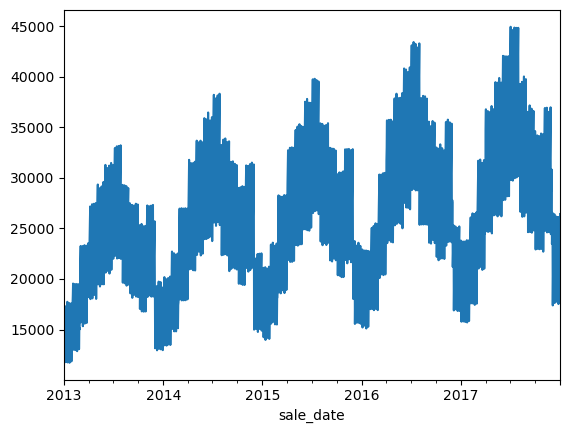

In [30]:
df.groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

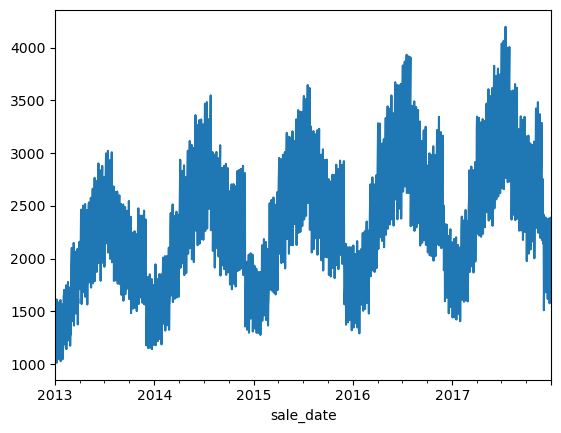

In [37]:
df[df['store_zipcode'] == '78253'].groupby('sale_date')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

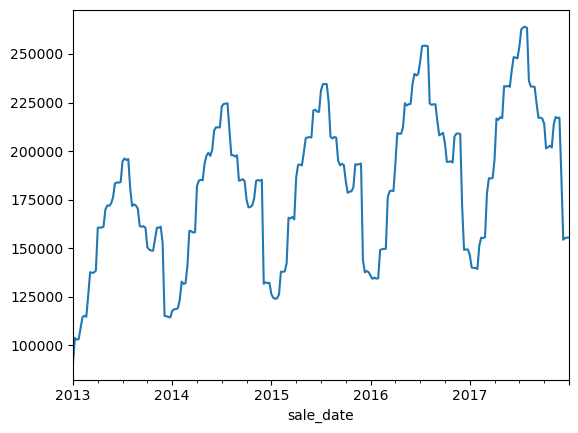

In [34]:
df.resample('W')['sale_amount'].sum().plot()

<AxesSubplot:xlabel='sale_date'>

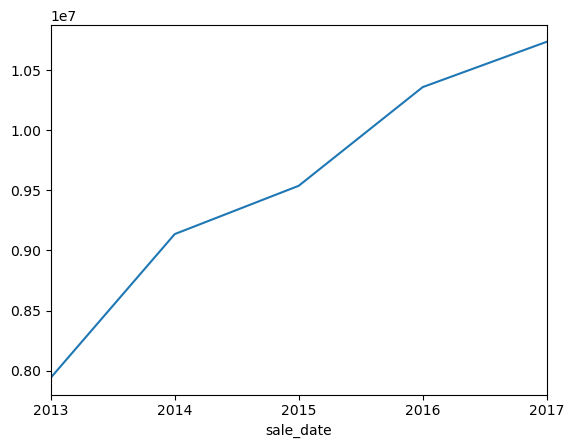

In [35]:
df.resample('Y')['sale_amount'].sum().plot()

## Exploratory Analysis 

In [41]:
url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)


Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


### Splitting the Data

- Human-based

- Pertentage based 

- Cross-validation

In [45]:
train_len = int(.6 * len(df))
val_test_split = int(.8 * len(df))

train_len, val_test_split

(27151, 36201)

In [46]:
train = df.iloc[:train_len]
validate = df.iloc[train_len:val_test_split]
test = df.iloc[val_test_split:]

train.shape, validate.shape, test.shape

((27151, 1), (9050, 1), (9051, 1))

In [ ]:
def subset_time_series(df):
    
    train_len = int(.6 * len(df))
    val_test_split = int(.8 * len(df))
    
    train = df.iloc[:train_len]
    validate = df.iloc[train_len:val_test_split]
    test = df.iloc[val_test_split:]
    
    print(train.shape, validate.shape, test.shape)

    return train, validate, test

In [49]:
train, validate, test = subset_time_series(df)

(27151, 1) (9050, 1) (9051, 1)


### Visualize Individual variables

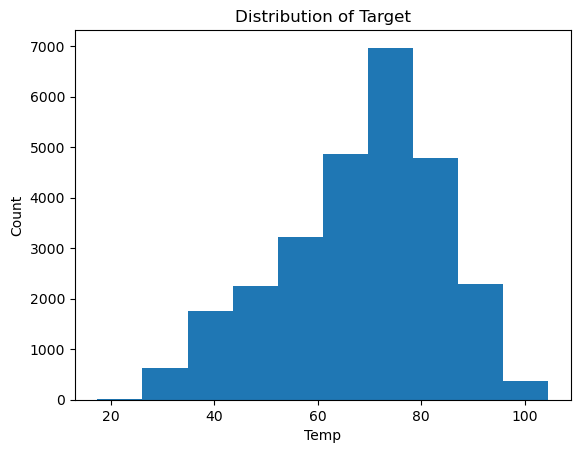

In [52]:
plt.hist(train)
plt.xlabel('Temp')
plt.ylabel('Count')
plt.title('Distribution of Target')
plt.show()

In [54]:
train['month'] = train.index.month_name()

In [57]:
train['day'] = train.index.day_name()

In [59]:
train.head()

,temp,month,day
datetime,,,
2012-10-01 13:00:00,61.052000,October,Monday
2012-10-01 14:00:00,61.076568,October,Monday
2012-10-01 15:00:00,61.139294,October,Monday
2012-10-01 16:00:00,61.202020,October,Monday
2012-10-01 17:00:00,61.264747,October,Monday


<AxesSubplot:xlabel='month'>

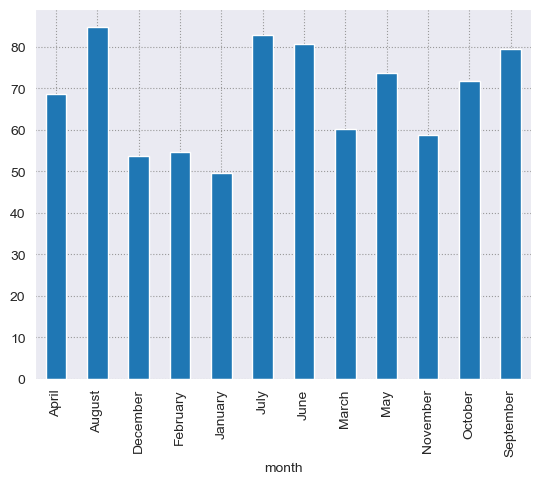

In [65]:
train.groupby('month')['temp'].mean().plot.bar()

### Visualize target over time

<AxesSubplot:xlabel='datetime'>

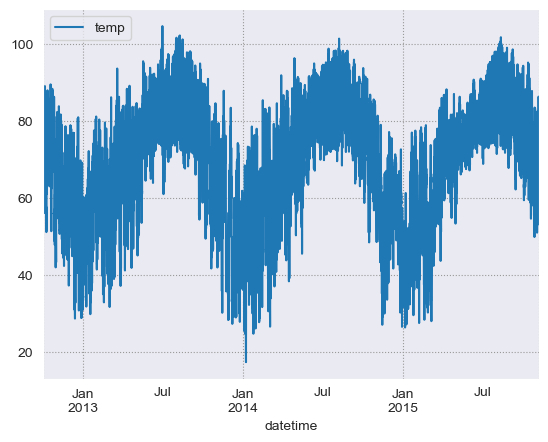

In [66]:
train.plot()

<AxesSubplot:xlabel='datetime'>

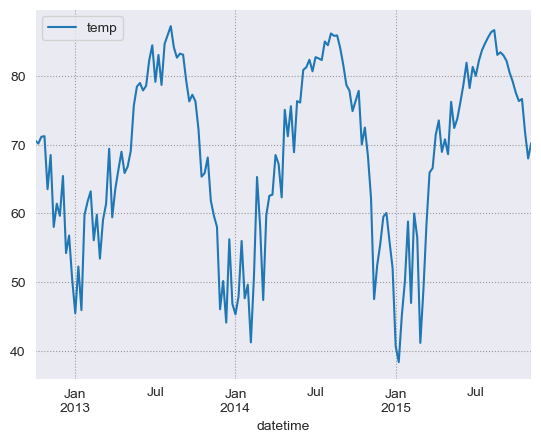

In [67]:
train.resample('W').mean().plot()

<AxesSubplot:xlabel='datetime'>

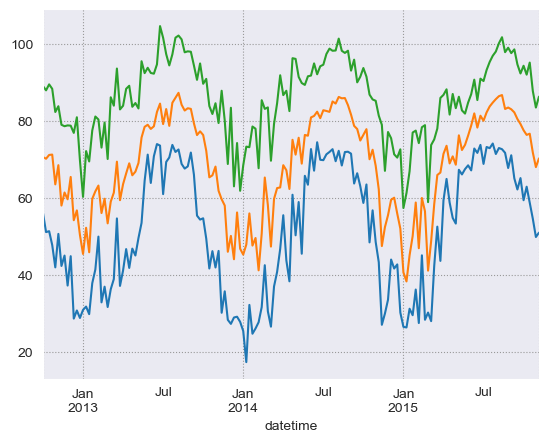

In [76]:
train.resample('W').min()['temp'].plot()
train.resample('W').mean()['temp'].plot()
train.resample('W').max()['temp'].plot()

In [79]:
train.groupby([train.indmex.year, train.index.month]).mean()

temp
datetime datetime           
2012     10        69.318705
         11        62.521575
         12        56.860014
2013     1         53.192333
         2         58.522799
         3         61.244479
         4         66.569717
         5         73.358529
         6         80.885728
         7         81.731819
         8         84.534117
         9         79.016805
         10        70.343832
         11        56.686028
         12        49.165310
2014     1         49.072897
         2         53.579080
         3         58.842459
         4         68.908933
         5         73.311970
         6         81.337658
         7         83.476876
         8         85.178102
         9         78.238621
         10        73.567252
         11        54.735951
         12        55.311824
2015     1         46.631940
         2         51.874683
         3         60.277705
         4         70.526879
         5         74.169747
         6         80.135967
         7         83.264325
         8         84.789859
         9         80.938208
         10        73.766466
         11        69.915052

In [80]:
train.groupby([train.index.year, train.index.month]).mean().unstack(0)

temp                                 
datetime       2012       2013       2014       2015
datetime                                            
1               NaN  53.192333  49.072897  46.631940
2               NaN  58.522799  53.579080  51.874683
3               NaN  61.244479  58.842459  60.277705
4               NaN  66.569717  68.908933  70.526879
5               NaN  73.358529  73.311970  74.169747
6               NaN  80.885728  81.337658  80.135967
7               NaN  81.731819  83.476876  83.264325
8               NaN  84.534117  85.178102  84.789859
9               NaN  79.016805  78.238621  80.938208
10        69.318705  70.343832  73.567252  73.766466
11        62.521575  56.686028  54.735951  69.915052
12        56.860014  49.165310  55.311824        NaN

<AxesSubplot:xlabel='datetime'>

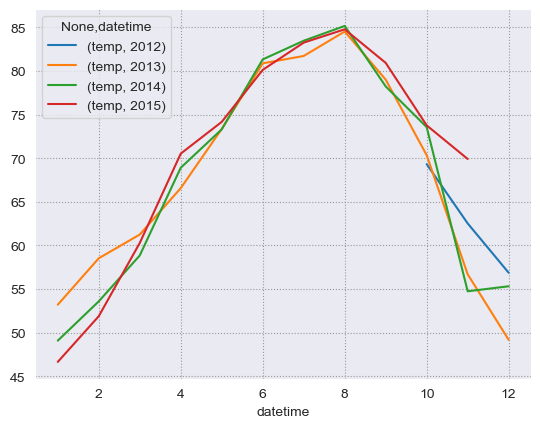

In [78]:
train.groupby([train.index.year, train.index.month]).mean().unstack(0).plot()

### Lag Plots

In [87]:
week_mean = train.resample('w').mean()

week_mean

,temp
datetime,
2012-10-07,70.595201
2012-10-14,70.152821
2012-10-21,71.138375
2012-10-28,71.230464
2012-11-04,63.510554
...,...
2015-10-11,76.334871
2015-10-18,76.649744
2015-10-25,71.780166


In [88]:
week_mean['shifted'] = week_mean['temp'].shift(-1)

week_mean

,temp,shifted
datetime,,
2012-10-07,70.595201,70.152821
2012-10-14,70.152821,71.138375
2012-10-21,71.138375,71.230464
2012-10-28,71.230464,63.510554
2012-11-04,63.510554,68.482625
...,...,...
2015-10-11,76.334871,76.649744
2015-10-18,76.649744,71.780166
2015-10-25,71.780166,67.988276


Text(0, 0.5, 'temp tomorrow')

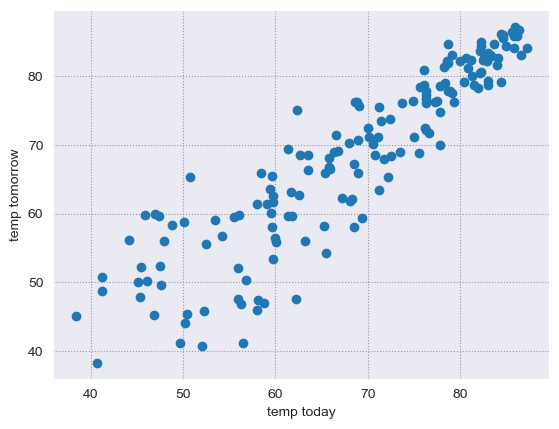

In [89]:
plt.scatter(week_mean['temp'], week_mean['shifted'])
plt.xlabel('temp today')
plt.ylabel('temp tomorrow')

In [82]:
train.head()

,temp,month,day
datetime,,,
2012-10-01 13:00:00,61.052000,October,Monday
2012-10-01 14:00:00,61.076568,October,Monday
2012-10-01 15:00:00,61.139294,October,Monday
2012-10-01 16:00:00,61.202020,October,Monday
2012-10-01 17:00:00,61.264747,October,Monday


Text(0, 0.5, 'temp tomorrow')

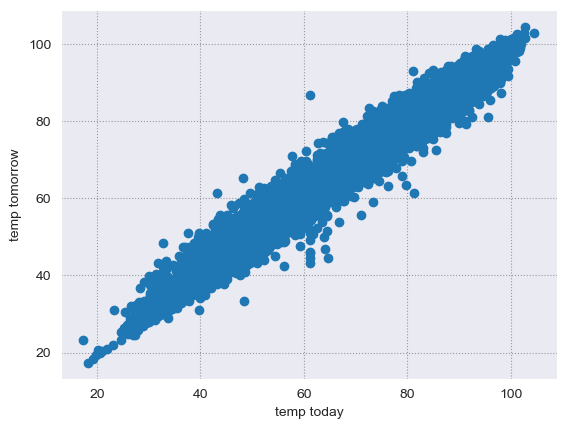

In [86]:
plt.scatter(train['temp'], train['temp'].shift(-1))
plt.xlabel('temp today')
plt.ylabel('temp tomorrow')

In [90]:
week_mean['half_year'] = week_mean['temp'].shift(-26)

week_mean.head()

,temp,shifted,half_year
datetime,,,
2012-10-07,70.595201,70.152821,63.558611
2012-10-14,70.152821,71.138375,66.345532
2012-10-21,71.138375,71.230464,68.965502
2012-10-28,71.230464,63.510554,65.862071
2012-11-04,63.510554,68.482625,66.797107


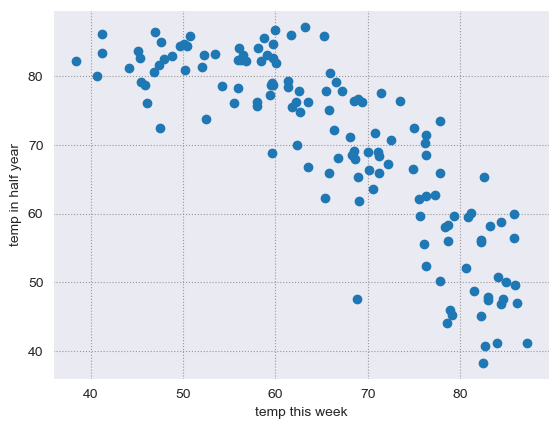

In [91]:
plt.scatter(week_mean['temp'], week_mean['half_year'])
plt.xlabel('temp this week')
plt.ylabel('temp in half year')
plt.show()